# CIFAR-10 

In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step 


## 1. Baseline Model (No Regularization)

In [3]:
baseline = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

baseline.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

history_baseline = baseline.fit(x_train, y_train_cat,
                                validation_split=0.2,
                                epochs=30,
                                batch_size=128,
                                verbose=2)

C:\Users\DuaaHilal\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
313/313 - 18s - 59ms/step - accuracy: 0.3086 - loss: 1.9308 - val_accuracy: 0.3794 - val_loss: 1.7578
Epoch 2/30
313/313 - 20s - 64ms/step - accuracy: 0.3924 - loss: 1.7002 - val_accuracy: 0.4052 - val_loss: 1.6818
Epoch 3/30
313/313 - 14s - 44ms/step - accuracy: 0.4263 - loss: 1.6129 - val_accuracy: 0.4247 - val_loss: 1.6206
Epoch 4/30
313/313 - 14s - 45ms/step - accuracy: 0.4422 - loss: 1.5671 - val_accuracy: 0.4415 - val_loss: 1.5845
Epoch 5/30
313/313 - 20s - 65ms/step - accuracy: 0.4595 - loss: 1.5232 - val_accuracy: 0.4403 - val_loss: 1.5781
Epoch 6/30
313/313 - 15s - 46ms/step - accuracy: 0.4724 - loss: 1.4820 - val_accuracy: 0.4608 - val_loss: 1.5236
Epoch 7/30
313/313 - 14s - 45ms/step - accuracy: 0.4866 - loss: 1.4451 - val_accuracy: 0.4669 - val_loss: 1.5031
Epoch 8/30
313/313 - 15s - 48ms/step - accuracy: 0.4919 - loss: 1.4197 - val_accuracy: 0.4707 - val_loss: 1.4904
Epoch 9/30
313/313 - 14s - 44ms/step - accuracy: 0.5051 - loss: 1.3945 - val_accuracy: 0.4692 - 

## 2. Dropout Regularization

In [4]:
dropout_model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

dropout_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history_dropout = dropout_model.fit(x_train, y_train_cat,
                                    validation_split=0.2,
                                    epochs=30,
                                    batch_size=128,
                                    verbose=2)

Epoch 1/30
313/313 - 20s - 65ms/step - accuracy: 0.1834 - loss: 2.1661 - val_accuracy: 0.2604 - val_loss: 2.0187
Epoch 2/30
313/313 - 15s - 47ms/step - accuracy: 0.2182 - loss: 2.0610 - val_accuracy: 0.2743 - val_loss: 1.9922
Epoch 3/30
313/313 - 15s - 46ms/step - accuracy: 0.2238 - loss: 2.0351 - val_accuracy: 0.2857 - val_loss: 1.9765
Epoch 4/30
313/313 - 15s - 48ms/step - accuracy: 0.2354 - loss: 2.0134 - val_accuracy: 0.2821 - val_loss: 1.9617
Epoch 5/30
313/313 - 15s - 47ms/step - accuracy: 0.2417 - loss: 1.9995 - val_accuracy: 0.2851 - val_loss: 1.9786
Epoch 6/30
313/313 - 21s - 67ms/step - accuracy: 0.2385 - loss: 1.9942 - val_accuracy: 0.2951 - val_loss: 1.9612
Epoch 7/30
313/313 - 15s - 46ms/step - accuracy: 0.2470 - loss: 1.9858 - val_accuracy: 0.2908 - val_loss: 1.9601
Epoch 8/30
313/313 - 14s - 46ms/step - accuracy: 0.2494 - loss: 1.9801 - val_accuracy: 0.3100 - val_loss: 1.9654
Epoch 9/30
313/313 - 15s - 48ms/step - accuracy: 0.2569 - loss: 1.9779 - val_accuracy: 0.3143 - 

## 3. Early Stopping

In [6]:
early_stop_model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

early_stop_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_early = early_stop_model.fit(x_train, y_train_cat,
                                     validation_split=0.2,
                                     epochs=50,
                                     batch_size=128,
                                     callbacks=[early_stop],
                                     verbose=2)

Epoch 1/50
313/313 - 7s - 22ms/step - accuracy: 0.3187 - loss: 1.9026 - val_accuracy: 0.3533 - val_loss: 1.7860
Epoch 2/50
313/313 - 6s - 20ms/step - accuracy: 0.3904 - loss: 1.7011 - val_accuracy: 0.3983 - val_loss: 1.6742
Epoch 3/50
313/313 - 12s - 37ms/step - accuracy: 0.4196 - loss: 1.6237 - val_accuracy: 0.4142 - val_loss: 1.6460
Epoch 4/50
313/313 - 14s - 44ms/step - accuracy: 0.4443 - loss: 1.5578 - val_accuracy: 0.4397 - val_loss: 1.5778
Epoch 5/50
313/313 - 15s - 47ms/step - accuracy: 0.4598 - loss: 1.5114 - val_accuracy: 0.4542 - val_loss: 1.5554
Epoch 6/50
313/313 - 20s - 63ms/step - accuracy: 0.4723 - loss: 1.4843 - val_accuracy: 0.4475 - val_loss: 1.5600
Epoch 7/50
313/313 - 21s - 66ms/step - accuracy: 0.4836 - loss: 1.4525 - val_accuracy: 0.4615 - val_loss: 1.5421
Epoch 8/50
313/313 - 14s - 44ms/step - accuracy: 0.4933 - loss: 1.4230 - val_accuracy: 0.4757 - val_loss: 1.4838
Epoch 9/50
313/313 - 21s - 66ms/step - accuracy: 0.5037 - loss: 1.3985 - val_accuracy: 0.4805 - va

## 4. L2 Regularization (Weight Decay)

In [7]:
l2_model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])

l2_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

history_l2 = l2_model.fit(x_train, y_train_cat,
                          validation_split=0.2,
                          epochs=30,
                          batch_size=128,
                          verbose=2)

Epoch 1/30
313/313 - 20s - 65ms/step - accuracy: 0.3087 - loss: 2.4884 - val_accuracy: 0.3729 - val_loss: 2.0552
Epoch 2/30
313/313 - 16s - 50ms/step - accuracy: 0.3802 - loss: 1.9489 - val_accuracy: 0.3939 - val_loss: 1.8871
Epoch 3/30
313/313 - 16s - 52ms/step - accuracy: 0.4087 - loss: 1.8072 - val_accuracy: 0.4161 - val_loss: 1.7935
Epoch 4/30
313/313 - 21s - 66ms/step - accuracy: 0.4291 - loss: 1.7312 - val_accuracy: 0.4164 - val_loss: 1.7561
Epoch 5/30
313/313 - 21s - 68ms/step - accuracy: 0.4349 - loss: 1.6974 - val_accuracy: 0.4363 - val_loss: 1.7168
Epoch 6/30
313/313 - 16s - 51ms/step - accuracy: 0.4496 - loss: 1.6553 - val_accuracy: 0.4347 - val_loss: 1.7114
Epoch 7/30
313/313 - 17s - 54ms/step - accuracy: 0.4579 - loss: 1.6300 - val_accuracy: 0.4535 - val_loss: 1.6459
Epoch 8/30
313/313 - 20s - 63ms/step - accuracy: 0.4675 - loss: 1.6007 - val_accuracy: 0.4447 - val_loss: 1.6857
Epoch 9/30
313/313 - 16s - 50ms/step - accuracy: 0.4649 - loss: 1.6015 - val_accuracy: 0.4444 - 

## 5. Compare Validation Accuracy

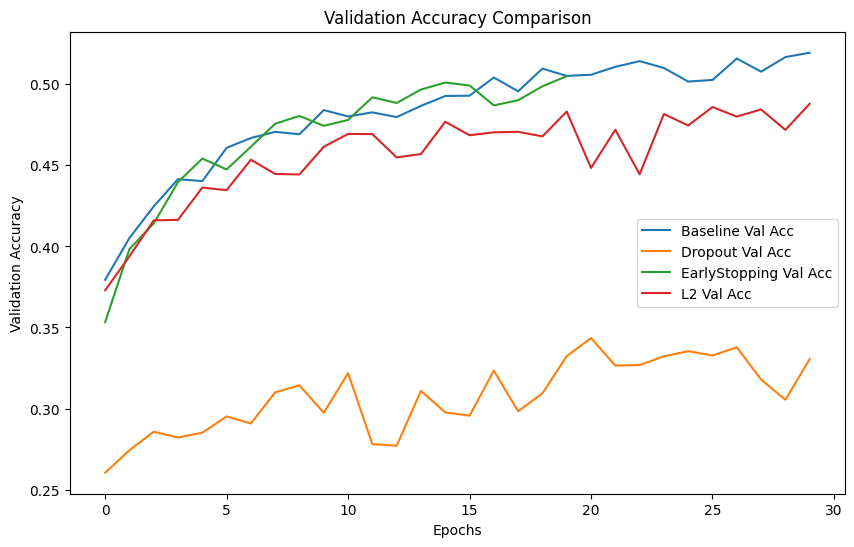

In [8]:
def plot_history(histories, title):
    plt.figure(figsize=(10,6))
    for name, history in histories.items():
        plt.plot(history.history['val_accuracy'], label=f'{name} Val Acc')
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy")
    plt.legend()
    plt.show()

plot_history({
    "Baseline": history_baseline,
    "Dropout": history_dropout,
    "EarlyStopping": history_early,
    "L2": history_l2
}, "Validation Accuracy Comparison")